In [17]:
!pip install yfinance


C:\Users\acer\AppData\Local\Temp\ipykernel_8972\3378787783.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645660  179.499589  174.425155  174.542932  104487900
2022-01-04  176.378357  179.558473  175.809076  179.254206   99310400
2022-01-05  171.686707  176.839663  171.411883  176.290017   94537600
2022-01-06  168.820679  172.059683  168.467333  169.507737   96904000
2022-01-07  168.987549  170.921136  167.868622  169.694241   86709100

Mean Squared Error: 14.194891618381567
R^2 Score: 0.9291534722420847


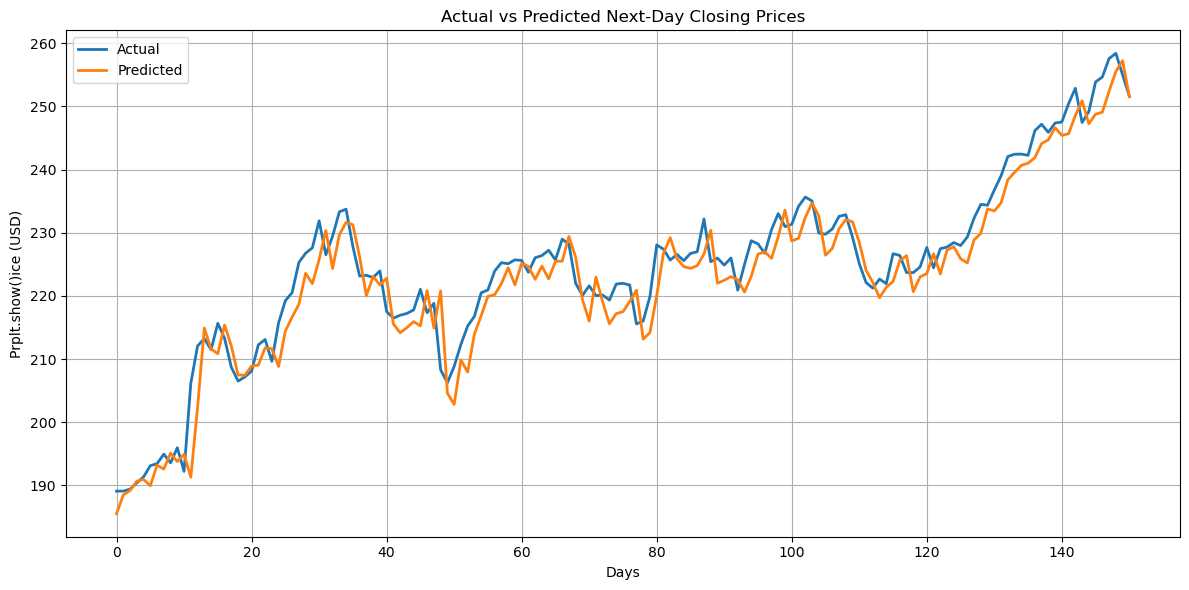

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Download stock data (e.g., Apple - AAPL)
stock = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
print(stock.head())

# 2. Prepare the dataset
df = stock[['Open', 'High', 'Low', 'Volume', 'Close']].copy()
df['Next_Close'] = df['Close'].shift(-1)  # target is next day's close
df.dropna(inplace=True)  # remove last row with NaN

# 3. Split features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5. Train model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Evaluation
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# 8. Plot Actual vs Predicted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linewidth=2)
plt.title("Actual vs Predicted Next-Day Closing Prices")
plt.xlabel("Days")
plt.ylabel("Prplt.show()ice (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()